In [76]:
# Netflix Movie Data Analysis Project

In [78]:
# Display data from Csv file
df = pd.read_csv('mymoviedb.csv' ,lineterminator='\n')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [106]:
#Import Useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data preprosesing 

In [79]:
df.info()  #view Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [80]:
df['Genre'].head() # Exploring Genre Column

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [81]:
# Check Duplicate data value rows
df.duplicated().sum()

np.int64(0)

In [82]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration Summary :
<b>. We have a dataFrame consisting of 9827 rows and 9 columns entries <br>
. Our dataset have no NaNs nor Duplicate values present.<br>
. Overview:<b/> We will drop both original_language and Post_Url column because they wouldn't be useful during Analysis.<br>
. There is noticable oultliers in Popularity Column.<br>
. Genre column has comma seprated value and white space that needs to be handle and casted into category.<br>
. Vote_Average better be categoried for proper analysis.<br>
. Release_Date column needs to be casted into Date Time and to extract only the year value.


# Data Cleaning

In [84]:
# Casting Release_Date into Date and extract only Year
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# Cofirming Changes 
print(df['Release_Date'].dtypes)

df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

datetime64[ns]


dtype('int32')

In [85]:
df.head()  # Now we get Only Year In Release_Date

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Dropping the Columns

In [86]:
cols = ['Overview' ,'Original_Language', 'Poster_Url'] # store dropping cols into List 

In [87]:
df.drop(cols ,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [88]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


 **Categorizing `Vote_Average` column** : We would cut into 4 categories : `Popular`,`Average`,`Not_Popular` and `Below_Avg`to describe it more using `categorize_col()` function provided by above.

In [89]:
# Convert Text data into Labels
def categorize_col(df,col,labels):  # User define Function

    #setting the edge to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col] ,edges ,labels= labels , duplicates='drop')
    return df

In [90]:
# Define labels for edges
labels = ['Not_Popular', 'Below_Avg','Average','Popular']

# categorize_col based on label amd edges
categorize_col(df,'Vote_Average',labels)

df['Vote_Average']  #Confirming changes

0           Popular
1           Popular
2         Below_Avg
3           Popular
4           Average
           ...     
9822        Popular
9823    Not_Popular
9824    Not_Popular
9825        Average
9826        Popular
Name: Vote_Average, Length: 9827, dtype: category
Categories (4, object): ['Not_Popular' < 'Below_Avg' < 'Average' < 'Popular']

In [91]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


***Now we can see that `Vote_Average` categorize into labels***

In [92]:
df['Vote_Average'].value_counts()  # Exploring Column

Vote_Average
Not_Popular    2467
Popular        2450
Average        2412
Below_Avg      2398
Name: count, dtype: int64

In [93]:
# Drop NaNs value from each row of data
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# We would split `Genre`column into list and then explode our DataFrame to have only one Genre for each row for each Movie 

In [94]:
# Split the string into List
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)  # Explode the list
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [95]:
df.info() # We see now Data row increses to 25552

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 923.6+ KB


In [97]:
# Casting Column into Category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [99]:
df.nunique() # Unque value in data

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

***Now ,our dataset is clean and tidy, we are left with a total of 6 columns and 25552 rows to dig during Analysis.*** 

# Data Visualization 

```Setting up Seaborn Configration :```

***We need to solve the following questions to help the company make informative business decisions accordingly***

<b>1.What is the most frequent genre of movies released on Netflix? <br>
2.Which has highest votes in vote avg column? <br>
3.What movie got the highest popularity? what's its genre?<br>
4.What movie got the lowest popularity? what's its genre?<br>
5.Which year has the most filmmed movies?<br>


In [110]:
sns.set_style('whitegrid') # Setting up seaborn configration

# 1.What is the most frequent genre of movies released on Netflix?

In [125]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

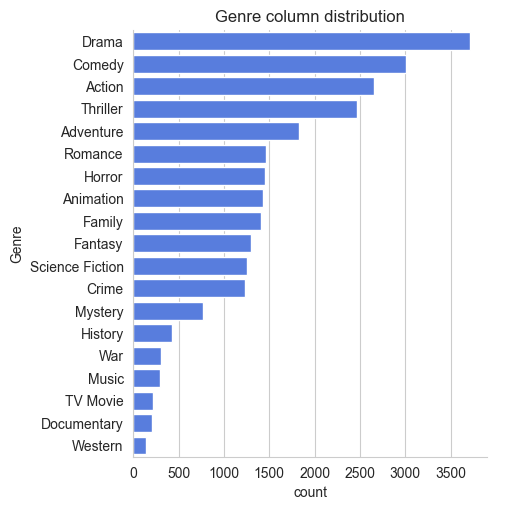

In [118]:
# Visualizating Genere column
sns.catplot(y= 'Genre', data= df, kind= 'count', order= df['Genre'].value_counts().index, color='#4273f3')

plt.title("Genre column distribution")
plt.show()

<b>Observation : We can notice that in our dataset `Drama` genre is the most frequent genre released on Netflix.

# 2.Which has highest votes in Vote_Average column?

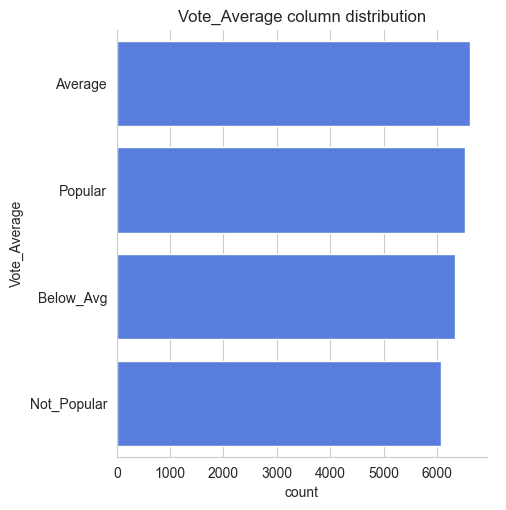

In [120]:
# Visualizating Genere column
sns.catplot(y= 'Vote_Average', data= df, kind= 'Count', order= df['Vote_Average'].value_counts().index, color='#4273f3')

plt.title("Vote_Average column distribution")
plt.show()

***Observation : We can notice that in our dataset `Drama` again gets the highest popularity among fans by having more then 18.5% of movies popularities.***

In [119]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


# 3.What movie got the highest popularity? what's its genre?

In [123]:
# Checking most popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


***`Result`: The `Spider-Man` movie has the highest popularity rate, and it has Genres of `Action`,`Adventure`,`Science Fiction
`***

# 4.What movie got the lowest popularity? what's its genre?

In [126]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


***Observation: The `United States vs. Billie`, `Threads` has lowest popularity in our datasets. it has Genre of `Music`,`Drama`,`History` and
`Threads` :`War`,`Drama`,`Science Fiction`***

# 5.Which year has the most filmmed movies?

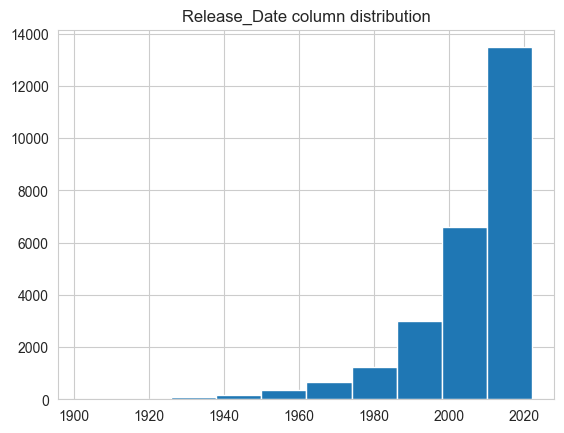

In [129]:
df['Release_Date'].hist()
plt.title("Release_Date column distribution")
plt.show()

***Observation: `Year 2020` has the most filmmed movies.***